In [1]:
import pickle
import sys
sys.path.append('../')
from utils.utils import *
from utils.ccf_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, ward
from scipy.spatial.distance import pdist
import pickle
import numpy as np
import shutil
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from sklearn import metrics
from scipy import stats
from scipy.optimize import curve_fit
def linear_function(x, a, b):
    return a * x + b

In [2]:
region_dis = pd.read_excel('../../data/41586_2014_BFnature13186_MOESM72_ESM.xlsx', index_col=0)

tmp_list = [i for i in region_dis.index if i.endswith('_ipsi')]

region_dis = region_dis.loc[tmp_list, tmp_list]

region_dis.index = [i.split('_')[0] for i in tmp_list]
region_dis.columns = [i.split('_')[0] for i in tmp_list]

region_dis

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,NOD,SIM,AN,PRM,COPY,PFL,FL,FN,IP,DN
FRP,0.000000,2232.431410,1953.362486,3488.015195,4717.719258,3823.447397,2901.508228,3559.230956,4987.108381,2333.720206,...,9979.886021,9088.798050,10134.193357,10607.573945,10421.642145,9600.260413,8822.591739,9716.159221,9496.479611,9550.654428
MOp,2232.431410,0.000000,683.282518,2400.260403,2822.343884,1599.609327,1713.548949,1522.538998,2762.019189,1252.497505,...,8225.303946,7035.712473,8127.768759,8720.772615,8579.080662,7926.458856,7122.982170,7864.715507,7634.011069,7717.107619
MOs,1953.362486,683.282518,0.000000,3006.763210,3471.130940,2015.099253,2324.462303,2175.718272,3219.569071,1808.486937,...,8447.262870,7402.575565,8521.076810,9074.690077,8890.655206,8375.596994,7528.113974,8105.900629,7935.442647,8076.238295
SSp-n,3488.015195,2400.260403,3006.763210,0.000000,1831.154008,2737.471461,736.545993,1722.824715,3211.308145,1418.626096,...,8077.553776,6731.920231,7584.400108,8151.418588,8137.375191,6751.944164,6188.547891,7767.077958,7302.268483,7102.024359
SSp-bfd,4717.719258,2822.343884,3471.130940,1831.154008,0.000000,2023.147301,1986.988928,1330.883165,1760.859165,2476.009895,...,6912.036603,5184.170618,6093.439095,6824.862636,6867.040847,5746.466305,5157.397600,6487.150761,6020.278233,5862.753193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PFL,9600.260413,7926.458856,8375.596994,6751.944164,5746.466305,6833.465446,7221.928413,6792.321032,6108.907431,7816.888767,...,3570.101539,3194.330916,2695.714191,2485.080482,2750.113634,0.000000,1066.829415,3563.179760,2753.293482,1870.828693
FL,8822.591739,7122.982170,7528.113974,6188.547891,5157.397600,6010.043677,6586.017385,6079.987664,5338.831801,7136.394398,...,2908.822786,2606.362408,2485.709154,2343.608329,2399.739569,1066.829415,0.000000,2856.243162,2070.929743,1346.523301
FN,9716.159221,7864.715507,8105.900629,7767.077958,6487.150761,6545.322758,7929.375764,7067.752472,5840.804739,8305.720920,...,732.717544,2021.447501,2164.052911,1822.258214,1293.010054,3563.179760,2856.243162,0.000000,838.525492,1716.464389
IP,9496.479611,7634.011069,7935.442647,7302.268483,6020.278233,6319.562880,7528.321526,6725.139404,5567.820489,7957.425777,...,1185.854123,1611.482237,1615.162531,1330.883165,972.753823,2753.293482,2070.929743,838.525492,0.000000,897.566154


In [4]:
sele_region = [id_to_name(i) for i in dict_to_selected.keys()]
order_list = []

for i in sele_region:
    if i in list(region_dis.index):
        order_list.append(i)
        
region_dis = region_dis.loc[order_list, order_list]

# region_dis = region_dis.astype(int)
region_dis

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,NOD,SIM,AN,PRM,COPY,PFL,FL,FN,IP,DN
FRP,0.000000,2232.431410,1953.362486,3488.015195,4717.719258,3823.447397,2901.508228,3559.230956,4987.108381,2333.720206,...,9979.886021,9088.798050,10134.193357,10607.573945,10421.642145,9600.260413,8822.591739,9716.159221,9496.479611,9550.654428
MOp,2232.431410,0.000000,683.282518,2400.260403,2822.343884,1599.609327,1713.548949,1522.538998,2762.019189,1252.497505,...,8225.303946,7035.712473,8127.768759,8720.772615,8579.080662,7926.458856,7122.982170,7864.715507,7634.011069,7717.107619
MOs,1953.362486,683.282518,0.000000,3006.763210,3471.130940,2015.099253,2324.462303,2175.718272,3219.569071,1808.486937,...,8447.262870,7402.575565,8521.076810,9074.690077,8890.655206,8375.596994,7528.113974,8105.900629,7935.442647,8076.238295
SSp-n,3488.015195,2400.260403,3006.763210,0.000000,1831.154008,2737.471461,736.545993,1722.824715,3211.308145,1418.626096,...,8077.553776,6731.920231,7584.400108,8151.418588,8137.375191,6751.944164,6188.547891,7767.077958,7302.268483,7102.024359
SSp-bfd,4717.719258,2822.343884,3471.130940,1831.154008,0.000000,2023.147301,1986.988928,1330.883165,1760.859165,2476.009895,...,6912.036603,5184.170618,6093.439095,6824.862636,6867.040847,5746.466305,5157.397600,6487.150761,6020.278233,5862.753193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PFL,9600.260413,7926.458856,8375.596994,6751.944164,5746.466305,6833.465446,7221.928413,6792.321032,6108.907431,7816.888767,...,3570.101539,3194.330916,2695.714191,2485.080482,2750.113634,0.000000,1066.829415,3563.179760,2753.293482,1870.828693
FL,8822.591739,7122.982170,7528.113974,6188.547891,5157.397600,6010.043677,6586.017385,6079.987664,5338.831801,7136.394398,...,2908.822786,2606.362408,2485.709154,2343.608329,2399.739569,1066.829415,0.000000,2856.243162,2070.929743,1346.523301
FN,9716.159221,7864.715507,8105.900629,7767.077958,6487.150761,6545.322758,7929.375764,7067.752472,5840.804739,8305.720920,...,732.717544,2021.447501,2164.052911,1822.258214,1293.010054,3563.179760,2856.243162,0.000000,838.525492,1716.464389
IP,9496.479611,7634.011069,7935.442647,7302.268483,6020.278233,6319.562880,7528.321526,6725.139404,5567.820489,7957.425777,...,1185.854123,1611.482237,1615.162531,1330.883165,972.753823,2753.293482,2070.929743,838.525492,0.000000,897.566154


<Axes: >

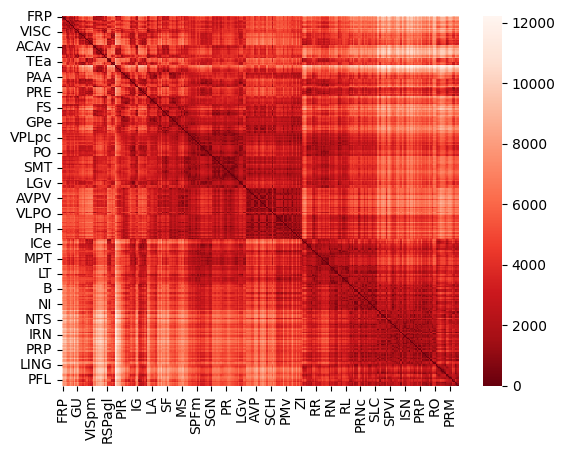

In [5]:
sns.heatmap(region_dis,
            cmap='Reds_r',
           )

In [6]:
region_sim = pd.read_csv('../figure1/eucl_region_similarity_using174_region.csv', sep=',', index_col=0)

region_sim

,FRP,MOp,MOs,SSp-n,SSp-bfd,SSp-ll,SSp-m,SSp-ul,SSp-tr,SSp-un,...,SPIV,CENT,CUL,DEC,FOTU,SIM,AN,COPY,PFL,FL
FRP,1.000000,0.701205,0.746701,0.760539,0.791235,0.676851,0.739575,0.647752,0.746334,0.736902,...,0.134753,0.302799,0.154543,0.083386,0.052803,0.299386,0.093394,0.076032,0.118016,0.070755
MOp,0.701205,1.000000,0.874966,0.817356,0.795955,0.786861,0.918361,0.879372,0.637598,0.794357,...,0.106974,0.234783,0.134376,0.068398,0.048277,0.279184,0.077648,0.059424,0.129291,0.058719
MOs,0.746701,0.874966,1.000000,0.869013,0.884186,0.851463,0.915525,0.837040,0.713349,0.894804,...,0.116122,0.257584,0.142511,0.072146,0.050072,0.291861,0.082741,0.064222,0.117162,0.062239
SSp-n,0.760539,0.817356,0.869013,1.000000,0.900155,0.802306,0.873557,0.792269,0.751525,0.865196,...,0.120854,0.265055,0.146522,0.072817,0.050975,0.305422,0.085317,0.066640,0.113474,0.066466
SSp-bfd,0.791235,0.795955,0.884186,0.900155,1.000000,0.810548,0.852457,0.770874,0.775751,0.895481,...,0.126289,0.283654,0.154039,0.078130,0.052340,0.309706,0.089718,0.068243,0.112104,0.066529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SIM,0.299386,0.279184,0.291861,0.305422,0.309706,0.311342,0.293598,0.291249,0.330487,0.299581,...,0.097678,0.220708,0.217350,0.084030,0.094220,1.000000,0.099072,0.041921,0.083254,0.057002
AN,0.093394,0.077648,0.082741,0.085317,0.089718,0.079552,0.080415,0.076875,0.094590,0.083111,...,0.318483,0.240166,0.141139,0.079462,0.079608,0.099072,1.000000,0.043231,0.034422,0.063730
COPY,0.076032,0.059424,0.064222,0.066640,0.068243,0.060793,0.061972,0.054752,0.075859,0.066175,...,0.124652,0.100852,0.043797,0.029805,0.021443,0.041921,0.043231,1.000000,0.020892,0.174615
PFL,0.118016,0.129291,0.117162,0.113474,0.112104,0.108920,0.123260,0.122335,0.093388,0.105935,...,0.036082,0.060628,0.048743,0.027647,0.035144,0.083254,0.034422,0.020892,1.000000,0.025671


In [7]:
intersection_list = list(set(region_sim.index).intersection(set(region_dis.index)))
print(intersection_list[0:5])
print(len(intersection_list))

['VISpm', 'AN', 'MA', 'VISpl', 'PAA']
162


In [8]:
long_dis = region_dis.stack().reset_index()
long_dis.columns = ['source_region', 'target_region', 'euc_dis']

long_dis = long_dis[long_dis['source_region'] != long_dis['target_region']].copy()

long_dis

,source_region,target_region,euc_dis
1,FRP,MOp,2232.431410
2,FRP,MOs,1953.362486
3,FRP,SSp-n,3488.015195
4,FRP,SSp-bfd,4717.719258
5,FRP,SSp-ll,3823.447397
...,...,...,...
85843,DN,COPY,1123.888340
85844,DN,PFL,1870.828693
85845,DN,FL,1346.523301
85846,DN,FN,1716.464389


In [9]:
long_dis = long_dis[long_dis['source_region'].isin(intersection_list) & long_dis['target_region'].isin(intersection_list)].copy()
region_sim = region_sim.loc[intersection_list, intersection_list].copy()
long_dis['sim'] = -1

for i in long_dis.index:
    tmp_src = long_dis.loc[i, 'source_region']
    tmp_tar = long_dis.loc[i, 'target_region']
    long_dis.loc[i, 'sim'] = region_sim.loc[tmp_src, tmp_tar]

long_dis = long_dis[long_dis['euc_dis']<10000].copy()
long_dis

C:\Users\yishui\AppData\Local\Temp\ipykernel_36748\1409050641.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7012049601944058' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  long_dis.loc[i, 'sim'] = region_sim.loc[tmp_src, tmp_tar]


,source_region,target_region,euc_dis,sim
1,FRP,MOp,2232.431410,0.701205
2,FRP,MOs,1953.362486,0.746701
3,FRP,SSp-n,3488.015195,0.760539
4,FRP,SSp-bfd,4717.719258,0.791235
5,FRP,SSp-ll,3823.447397,0.676851
...,...,...,...,...
84957,FL,FOTU,3985.677483,0.054027
84961,FL,SIM,2606.362408,0.057002
84962,FL,AN,2485.709154,0.063730
84964,FL,COPY,2399.739569,0.174615


<Axes: xlabel='euc_dis', ylabel='Count'>

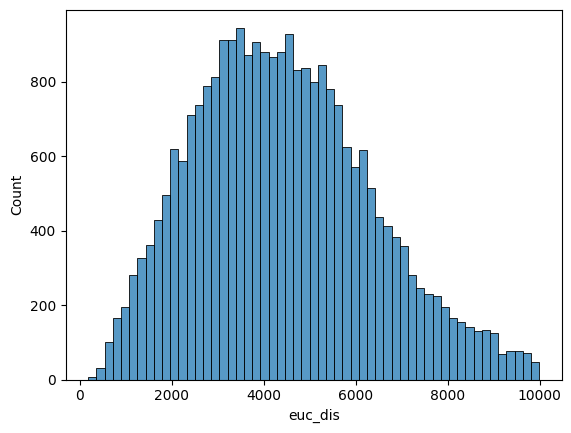

In [10]:
sns.histplot(long_dis['euc_dis'])

<Axes: xlabel='sim', ylabel='Count'>

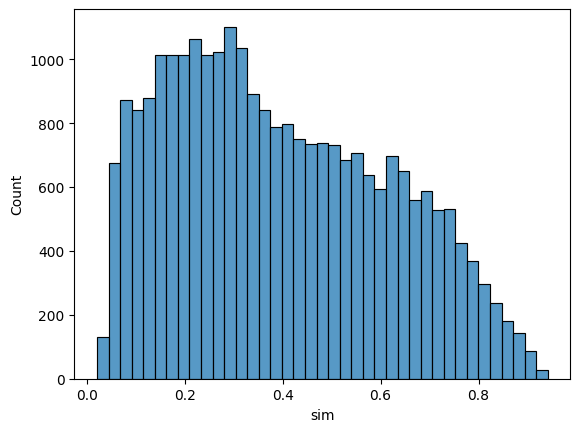

In [11]:
sns.histplot(long_dis['sim'])

In [13]:
long_dis['sim_cat'] = -1
for i in list(range(1,61))[::-1]:
    long_dis.loc[long_dis['sim']<=i/60, 'sim_cat'] = i

long_dis

,source_region,target_region,euc_dis,sim,sim_cat
1,FRP,MOp,2232.431410,0.701205,43
2,FRP,MOs,1953.362486,0.746701,45
3,FRP,SSp-n,3488.015195,0.760539,46
4,FRP,SSp-bfd,4717.719258,0.791235,48
5,FRP,SSp-ll,3823.447397,0.676851,41
...,...,...,...,...,...
84957,FL,FOTU,3985.677483,0.054027,4
84961,FL,SIM,2606.362408,0.057002,4
84962,FL,AN,2485.709154,0.063730,4
84964,FL,COPY,2399.739569,0.174615,11


In [14]:
8000/40

200.0

In [15]:
long_dis['euc_dis_cat'] = -1
for i in list(range(1,41))[::-1]:
    long_dis.loc[long_dis['euc_dis']<i*200, 'euc_dis_cat'] = i

long_dis = long_dis[long_dis['euc_dis_cat'] != -1].copy()
long_dis

,source_region,target_region,euc_dis,sim,sim_cat,euc_dis_cat
1,FRP,MOp,2232.431410,0.701205,43,12
2,FRP,MOs,1953.362486,0.746701,45,10
3,FRP,SSp-n,3488.015195,0.760539,46,18
4,FRP,SSp-bfd,4717.719258,0.791235,48,24
5,FRP,SSp-ll,3823.447397,0.676851,41,20
...,...,...,...,...,...,...
84957,FL,FOTU,3985.677483,0.054027,4,20
84961,FL,SIM,2606.362408,0.057002,4,14
84962,FL,AN,2485.709154,0.063730,4,13
84964,FL,COPY,2399.739569,0.174615,11,12


In [16]:
long_dis['euc_dis_log'] = np.log10(long_dis['euc_dis'])
long_dis

,source_region,target_region,euc_dis,sim,sim_cat,euc_dis_cat,euc_dis_log
1,FRP,MOp,2232.431410,0.701205,43,12,3.348778
2,FRP,MOs,1953.362486,0.746701,45,10,3.290783
3,FRP,SSp-n,3488.015195,0.760539,46,18,3.542578
4,FRP,SSp-bfd,4717.719258,0.791235,48,24,3.673732
5,FRP,SSp-ll,3823.447397,0.676851,41,20,3.582455
...,...,...,...,...,...,...,...
84957,FL,FOTU,3985.677483,0.054027,4,20,3.600502
84961,FL,SIM,2606.362408,0.057002,4,14,3.416035
84962,FL,AN,2485.709154,0.063730,4,13,3.395450
84964,FL,COPY,2399.739569,0.174615,11,12,3.380164


In [17]:
# sns.scatterplot(data=long_dis, 
#                 x='sim_cat',
#                 y='euc_dis_cat'
#                )

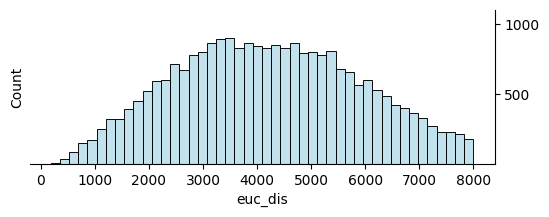

In [26]:
f,ax = plt.subplots(1,1,figsize=(6,2))
sns.histplot(data=long_dis, x='euc_dis', color='lightblue')

ax.yaxis.tick_right()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([500,1000])
plt.ylim([0,1100])
plt.savefig('./euc_dis.svg', bbox_inches='tight')
plt.show()

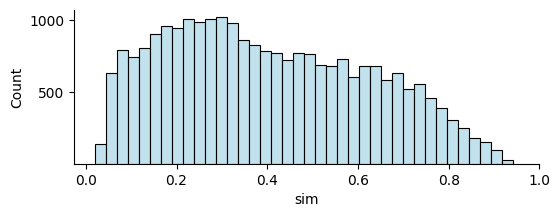

In [27]:
f,ax = plt.subplots(1,1,figsize=(6,2))
sns.histplot(data=long_dis, x='sim', color='lightblue')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks([500,1000])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig('./sim_dis.svg', bbox_inches='tight')
plt.show()

In [28]:
long_dis2 = long_dis[long_dis['euc_dis']>0]
stats.pearsonr(long_dis2['euc_dis'], long_dis2['sim'])

PearsonRResult(statistic=-0.23596806074367557, pvalue=5.904917563397776e-309)

In [29]:
cross_df = pd.crosstab(long_dis['euc_dis_cat'], long_dis['sim_cat'])
# cross_df.index.name = ''
# cross_df.columns.name = ''

# cross_df = cross_df.iloc[:0:-1, :0:-1].copy()

cross_df

sim_cat,2,3,4,5,6,7,8,9,10,11,...,48,49,50,51,52,53,54,55,56,57
euc_dis_cat,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,2,0,0,0,...,0,0,2,2,2,2,0,0,0,0
4,0,0,2,2,0,0,2,2,0,0,...,4,2,4,2,2,8,0,2,0,0
5,0,2,0,6,2,2,0,2,2,0,...,2,2,2,0,2,0,2,2,0,0
6,2,0,4,6,0,2,8,2,0,10,...,4,4,10,0,2,2,8,0,2,0
7,0,2,2,2,2,4,0,6,6,10,...,10,2,4,6,8,4,6,0,2,2
8,0,4,4,4,16,6,12,6,4,12,...,10,0,4,2,8,4,4,6,0,0
9,0,2,2,16,2,4,14,10,8,6,...,8,10,8,8,4,0,6,2,2,2


In [30]:
x = long_dis['sim_cat']
y = 40-long_dis['euc_dis_cat']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x)-1, max(x), 100)
y_fit = linear_function(x_fit, a, b)

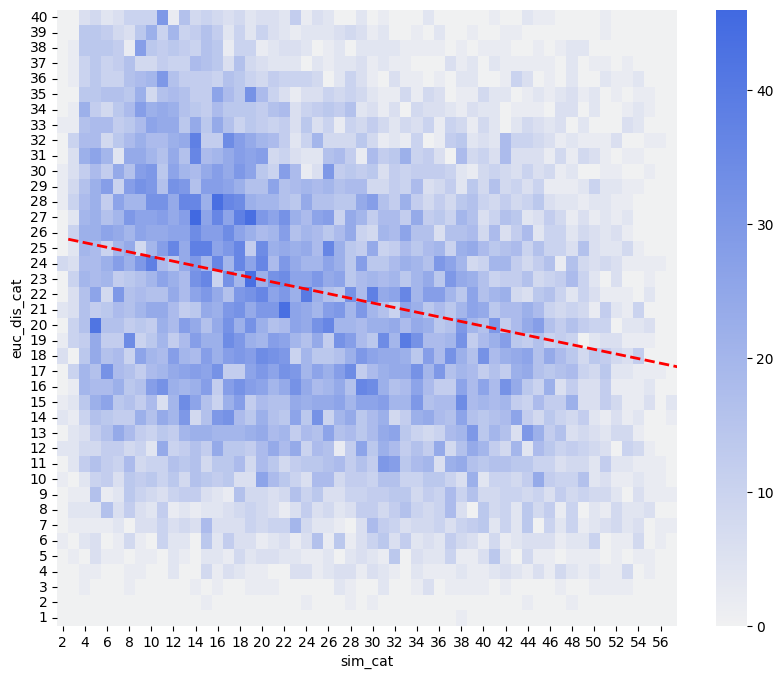

PearsonRResult(statistic=-0.23596806074367557, pvalue=5.904917563397776e-309)

In [31]:
f, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(cross_df.iloc[::-1,], 
            cmap=sns.color_palette("light:royalblue", as_cmap=True),
            # mask=cross_df<=0
           )
plt.plot(x_fit, y_fit, color='red', 
         linewidth=2, linestyle='--',
         label='Fitted Curve')
plt.savefig('./euc_dis_sim_dis.svg', bbox_inches='tight')
plt.show()
# long_dis2 = long_dis[long_dis['euc_dis']>0]
stats.pearsonr(long_dis2['euc_dis'], long_dis2['sim'])